# Basic Example (with SSH)

This example shows the basic features of the pansys module. In this example, an ansys session is started and a basic FE model is created.

In [1]:
from pansys import Ansys

To start a new session of ansys, just initialize the class ``Ansys()`` as shown below.

In [2]:
a = Ansys(host='aerox33798', cleanup=True)

Now we are ready to send commands to the ansys session.

In [3]:
a.send("/prep7")

Let's add a new ``BEAM188`` element type and some section and material properties.

In [4]:
a.send("""et,1,188
    sectype,1,beam,csolid
    secdata,0.1
    mp,ex,1,1e12
    mp,prxy,1,0.3
    """)

Now let's create our model.

In [5]:
a.send("csys,1")

In [6]:
a.send("n")
for i in range(10):
    a.send("n,,1,{}".format(360/10*i))
    a.send("e,1,{}".format(i+2))

In [7]:
img = a.plot("eplot")

Now the ``img`` variable contains the path to the image file. You can render that in a jupyter notebook using the IPython.display.Image method as shown below.

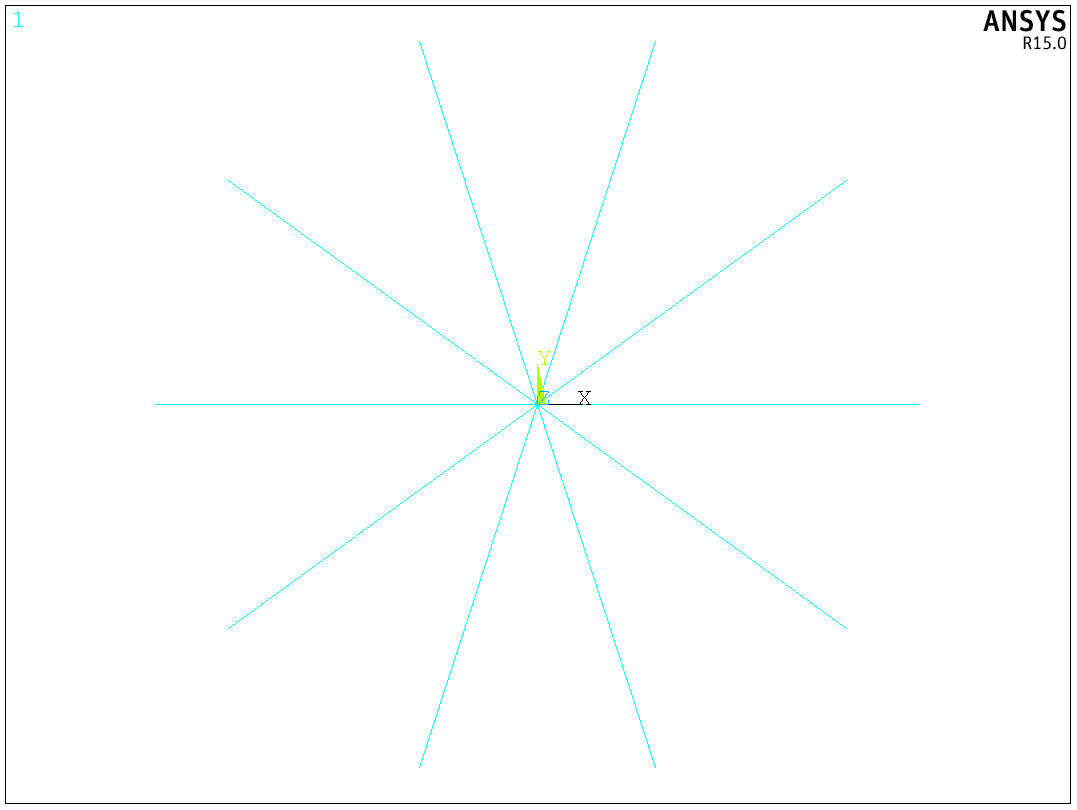

In [8]:
from IPython.display import Image
Image(img)

In [9]:
del a